no. of data points= 1048544


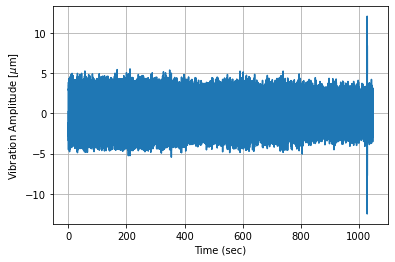

Positions(Hz),  Spectral Weight(a.u.)
9.7821    	 61.3038
11.1793    	 126.4236
12.5765    	 135.9781
13.9737    	 133.6740
15.3689    	 349.8039


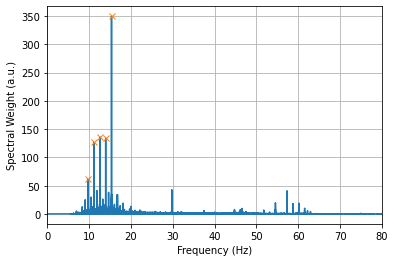

C:\Users\starcryo\AppData\Local\Temp\ipykernel_11372\3567239731.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_peaks = all_peaks.append(df)
C:\Users\starcryo\AppData\Local\Temp\ipykernel_11372\3567239731.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_peaks = all_peaks.append(df)
C:\Users\starcryo\AppData\Local\Temp\ipykernel_11372\3567239731.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_peaks = all_peaks.append(df)
C:\Users\starcryo\AppData\Local\Temp\ipykernel_11372\3567239731.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_peaks = all_peaks.append(df)
C:\Users\starcryo\AppData\Local\Temp\ipykern

In [37]:
## program release date 02/16/2022, last Updated on 02/17/2022, author: Pradeep Kumar @Star Cryo.

#import libraries
import pandas as pd
import numpy as np
from numpy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
from pylab import *
import scipy
import scipy.fftpack
import scipy.signal
from scipy.signal import find_peaks

# import X and Y values from csv file
t=pd.read_csv(r'C:\Users\starcryo\Desktop\rawfiles\ch3_fft.csv',usecols=[0])
a=pd.read_csv(r'C:\Users\starcryo\Desktop\rawfiles\ch3_fft.csv',usecols=[1])
n=len(a)
print('no. of data points=',n)
dt=0.001 #time increment in each data

acc=a.values.flatten() #to convert DataFrame to 1D array
tcc=t.values.flatten()

# plot original Time vs Vibration data
plt.plot(tcc,acc)
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel(r'Vibration Amplitude [$\mu$m]')
figure = plt.gcf() # get current figure
figure.set_size_inches(6, 4)
plt.savefig('ch3 TimeAmp.jpg', dpi=300)
plt.show()

# calculate FFT
fft=rfft(acc)*dt
freq=rfftfreq(n,d=dt)
FFT=abs(fft)

# find and plot peaks
height_threshold = 50 # set this value to the desired magnitude
peaks_index, properties = find_peaks(np.abs(fft), height=height_threshold, distance=10, width=1, wlen=None,)
peaks = scipy.signal.find_peaks(FFT)
print('Positions(Hz),  Spectral Weight(a.u.)')
[print("%4.4f    \t %3.4f" %(freq[peaks_index[i]], properties['peak_heights'][i])) for i in range(len(peaks_index))]

# plot fft
plt.plot(freq,FFT,freq[peaks_index], properties['peak_heights'],'x')
plt.xlim([0, 80])
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'Spectral Weight (a.u.)')
figure = plt.gcf() # get current figure
figure.set_size_inches(6, 4)
#plt.xscale('log')   # uncomment this line if you like to plot log along x-axis, use plt.yscale('log')for y-axis
plt.savefig('ch3 FFT.jpg', dpi=300)
plt.show()

# write peaks and spectral amplitude to csv
all_peaks = pd.DataFrame()
for j in range(len(peaks_index)):
    df = pd.DataFrame(data=[[freq[peaks_index[j]], properties['peak_heights'][j]]], columns=['Peak Frequency (Hz)','Spectral Weight (a.u.)'])
    all_peaks = all_peaks.append(df)
all_peaks.to_csv('ch3_selectedPeaks.csv', index=False)

#end of code